In [55]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflowjs as tfjs

## Data Wrangling

### Gather Data

In [2]:
destinasi_df = pd.read_csv("dataset/destinasi_wisata.csv")
destinasi_df.head()

,destinasi_wisata_id,nama_objek,jenis_objek,koordinat,alamat,kabupaten_kota,Rating,jumlah_reviewer,deskripsi,estimasi_harga_tiket
0,1,Air Terjun Oenesu,Air Terjun,"-10.265808948244858, 123.5662605976458","Oenesu, Kec. Kupang Bar., Kabupaten Kupang, Nu...",Kupang,4,117,Keunikan Dari Air Terjun Oenesu Ini Adalah Pad...,Rp. 2000
1,2,Danau Supul,Danau,"-9.840924083771892, 124.44881772462745","Supul, Kec. Kuatnana, Kabupaten Timor Tengah S...",Timor Tengah Selatan,"4,3",27,Danau ini banyak di tumbuhi tanaman eceng gond...,Rp. 2000
2,3,Danau Tuadale,Danau,"-10.324771012140449, 123.51115401114009","Lifuleo, Kec. Kupang Bar., Kabupaten Kupang, N...",Kupang,"4,2",53,"Spesifikasi dan daya tarik adalah rekreasi, ma...",Rp. 2000
3,4,Taman Wisata Alam Camplong,Taman,"-10.037771883129174, 123.92703046429074","Jl. Oesao - Bokong, Camplong I, Kec. Fatuleu, ...",Kupang,"4,2",510,Hutan Camplong merupakan hutan wisata dengan p...,Rp. 5000
4,5,Tugu Biinmafo Kota Kefamenanu,Tugu,"-9.515392685014094, 124.4921799399656","Naiola, Kec. Bikomi Sel., Kabupaten Timor Teng...",Timor Tengah Selatan,"4,6",53,"BIINMAFO, tugu selamat datatang yang menyambut...",Rp0


In [3]:
hotel_df = pd.read_csv("dataset/hotel_ntt.csv")
hotel_df.head()

,hotel_id,nama_hotel,jenis_hotel,alamat_hotel,kabupaten_kota,rating_hotel,jumlah_reviewer,harga_hotel
0,1,BANERA HOMESTAY,PONDOK WISATA,"Jl. TDN II No.4, Tuak Daun Merah, Kec. Oebobo,...",Kota Kupang,"4,2",68.0,Rp120.804
1,2,Hotel Ina Boi,PENYEDIAAN AKOMODASI JANGKA PENDEK LAINNYA,"JL. H.O.S.Cokrominoto No.1, Klp. Lima, Kec. Kl...",Kota Kupang,"3,9",93.0,Rp144.000
2,3,GUEST HOUSE TUNAS DAUD,HOTEL MELATI,"Jl. Adi Sucipto, Oesapa, Kec. Klp. Lima, Kota ...",Kota Kupang,4,64.0,Rp146.954
3,4,VANYAS HOTEL,HOTEL MELATI,"Jl. Jend. Soeharto No.55, Naikoten I, Kec. Kot...",Kota Kupang,4,25.0,Rp180.000
4,5,HOTEL CAHAYA BAPA,HOTEL MELATI,"Jl. Herewila No.34, Naikoten II, Kec. Kota Raj...",Kota Kupang,4,455.0,Rp120.000


In [4]:
daya_tarik_df = pd.read_csv("dataset/daya_tarik_by_kabupaten_kota.csv")
daya_tarik_df.head()

,kota_atau_kabupaten,tahun_2019,tahun_2020,tahun_2021,tahun_2022,tahun_2023,jumlah_daya_tarik
0,Sumba Barat,151,151,176,296,296,1070
1,Sumba Timur,37,37,37,37,37,185
2,Kupang,40,40,40,42,42,204
3,Timor Tengah Selatan,47,47,47,44,44,229
4,Timor Tengah Utara,11,11,11,11,61,105


### Assessing Data

### Destinasi Data

In [5]:
destinasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destinasi_wisata_id   76 non-null     int64 
 1   nama_objek            76 non-null     object
 2   jenis_objek           76 non-null     object
 3   koordinat             76 non-null     object
 4   alamat                76 non-null     object
 5   kabupaten_kota        76 non-null     object
 6   Rating                76 non-null     object
 7   jumlah_reviewer       76 non-null     int64 
 8   deskripsi             76 non-null     object
 9   estimasi_harga_tiket  76 non-null     object
dtypes: int64(2), object(8)
memory usage: 6.1+ KB


In [6]:
destinasi_df.isna().sum()

destinasi_wisata_id     0
nama_objek              0
jenis_objek             0
koordinat               0
alamat                  0
kabupaten_kota          0
Rating                  0
jumlah_reviewer         0
deskripsi               0
estimasi_harga_tiket    0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", destinasi_df.duplicated().sum())

Jumlah duplikasi:  0


### Hotel Data

In [8]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_id         417 non-null    int64  
 1   nama_hotel       417 non-null    object 
 2   jenis_hotel      417 non-null    object 
 3   alamat_hotel     417 non-null    object 
 4   kabupaten_kota   417 non-null    object 
 5   rating_hotel     417 non-null    object 
 6   jumlah_reviewer  417 non-null    float64
 7   harga_hotel      417 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.2+ KB


In [9]:
hotel_df.isna().sum()

hotel_id           0
nama_hotel         0
jenis_hotel        0
alamat_hotel       0
kabupaten_kota     0
rating_hotel       0
jumlah_reviewer    0
harga_hotel        0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hotel_df.duplicated().sum())

Jumlah duplikasi:  0


### Daya Tarik

In [11]:
daya_tarik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kota_atau_kabupaten  22 non-null     object
 1   tahun_2019           22 non-null     int64 
 2   tahun_2020           22 non-null     int64 
 3   tahun_2021           22 non-null     int64 
 4   tahun_2022           22 non-null     int64 
 5   tahun_2023           22 non-null     int64 
 6   jumlah_daya_tarik    22 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ KB


In [12]:
daya_tarik_df.isna().sum()

kota_atau_kabupaten    0
tahun_2019             0
tahun_2020             0
tahun_2021             0
tahun_2022             0
tahun_2023             0
jumlah_daya_tarik      0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", daya_tarik_df.duplicated().sum())

Jumlah duplikasi:  0


## Data Cleaning

### Destinasi

In [14]:
# Clean Destinasi Wisata DataFrame
def clean_destinasi(df):
    # Clean Rating - replace comma with dot and convert to float
    df['Rating'] = df['Rating'].str.replace(',','.').astype(float)
    
    # Clean ticket prices
    def clean_price(price):
        # Remove 'Rp' and '.' and extra spaces
        price = price.replace('Rp', '').replace('.', '').replace(' ', '')
        # If there's a range, take the average
        if '-' in price:
            prices = price.split('-')
            return sum(int(p) for p in prices) / len(prices)
        return int(price) if price else 0
    
    df['estimasi_harga_tiket'] = df['estimasi_harga_tiket'].apply(clean_price)
    
    return df

In [15]:
destinasi_df.head(15)

,destinasi_wisata_id,nama_objek,jenis_objek,koordinat,alamat,kabupaten_kota,Rating,jumlah_reviewer,deskripsi,estimasi_harga_tiket
0,1,Air Terjun Oenesu,Air Terjun,"-10.265808948244858, 123.5662605976458","Oenesu, Kec. Kupang Bar., Kabupaten Kupang, Nu...",Kupang,4,117,Keunikan Dari Air Terjun Oenesu Ini Adalah Pad...,Rp. 2000
1,2,Danau Supul,Danau,"-9.840924083771892, 124.44881772462745","Supul, Kec. Kuatnana, Kabupaten Timor Tengah S...",Timor Tengah Selatan,"4,3",27,Danau ini banyak di tumbuhi tanaman eceng gond...,Rp. 2000
2,3,Danau Tuadale,Danau,"-10.324771012140449, 123.51115401114009","Lifuleo, Kec. Kupang Bar., Kabupaten Kupang, N...",Kupang,"4,2",53,"Spesifikasi dan daya tarik adalah rekreasi, ma...",Rp. 2000
3,4,Taman Wisata Alam Camplong,Taman,"-10.037771883129174, 123.92703046429074","Jl. Oesao - Bokong, Camplong I, Kec. Fatuleu, ...",Kupang,"4,2",510,Hutan Camplong merupakan hutan wisata dengan p...,Rp. 5000
4,5,Tugu Biinmafo Kota Kefamenanu,Tugu,"-9.515392685014094, 124.4921799399656","Naiola, Kec. Bikomi Sel., Kabupaten Timor Teng...",Timor Tengah Selatan,"4,6",53,"BIINMAFO, tugu selamat datatang yang menyambut...",Rp0
5,6,Air Terjun Oehala,Air Terjun,"-9.802908668440715, 124.30736676695595","Jalan, Oehala, Kec. Mollo Tengah, Kabupaten Ti...",Timor Tengah Selatan,"4,4",330,Air Terjun Yang terdiri Dari 7 Tingkatan Besar...,Rp. 5000
6,7,Pantai Kolbano,Pantai,"-10.019510704605832, 124.53850403431765","Kolbano, Kec. Kolbano, Kabupaten Timor Tengah ...",Timor Tengah Selatan,"4,6",966,Bagi kebanyakan wisatawan mengunjungi pesisir ...,Rp. 2000 - 5000
7,8,Pantai Lasiana,Pantai,"-10.131134994755573, 123.66980122988093","Lasiana, Kec. Klp. Lima, Kota Kupang, Nusa Ten...",Kota Kupang,"4,3",1672,Pantai Lasiana mulai dibuka untuk umum sekitar...,Rp. 3000 - 6000
8,9,Pantai Manikin,Pantai,"-10.125037602034066, 123.67405762463108","VMFF+WJ7, Unnamed Road, Tarus, Tengah, Nusa Te...",Kota Kupang,"4,3",209,"Spesifikasi daya tarik memiliki panorama alam,...",Rp. 3000 - 5000
9,10,Pantai Oetune,Pantai,"-10.168052690160925, 124.39672649627035","Tuafanu, Kec. Kualin, Kabupaten Timor Tengah S...",Timor Tengah Selatan,"4,6",756,Pantai Oetune mempunyai pasir halus sepanjang ...,Rp. 3000


In [16]:
destinasi_df_clean = clean_destinasi(destinasi_df.copy())


In [17]:
destinasi_df_clean.head()

,destinasi_wisata_id,nama_objek,jenis_objek,koordinat,alamat,kabupaten_kota,Rating,jumlah_reviewer,deskripsi,estimasi_harga_tiket
0,1,Air Terjun Oenesu,Air Terjun,"-10.265808948244858, 123.5662605976458","Oenesu, Kec. Kupang Bar., Kabupaten Kupang, Nu...",Kupang,4.0,117,Keunikan Dari Air Terjun Oenesu Ini Adalah Pad...,2000.0
1,2,Danau Supul,Danau,"-9.840924083771892, 124.44881772462745","Supul, Kec. Kuatnana, Kabupaten Timor Tengah S...",Timor Tengah Selatan,4.3,27,Danau ini banyak di tumbuhi tanaman eceng gond...,2000.0
2,3,Danau Tuadale,Danau,"-10.324771012140449, 123.51115401114009","Lifuleo, Kec. Kupang Bar., Kabupaten Kupang, N...",Kupang,4.2,53,"Spesifikasi dan daya tarik adalah rekreasi, ma...",2000.0
3,4,Taman Wisata Alam Camplong,Taman,"-10.037771883129174, 123.92703046429074","Jl. Oesao - Bokong, Camplong I, Kec. Fatuleu, ...",Kupang,4.2,510,Hutan Camplong merupakan hutan wisata dengan p...,5000.0
4,5,Tugu Biinmafo Kota Kefamenanu,Tugu,"-9.515392685014094, 124.4921799399656","Naiola, Kec. Bikomi Sel., Kabupaten Timor Teng...",Timor Tengah Selatan,4.6,53,"BIINMAFO, tugu selamat datatang yang menyambut...",0.0


### Hotel

In [18]:
def clean_hotel(df):
    # Clean rating - replace comma with dot and convert to float  
    df['rating_hotel'] = df['rating_hotel'].str.replace(',','.').astype(float)
    
    # Clean hotel prices
    def clean_hotel_price(price):
        # Remove 'Rp' and extra spaces
        price = price.replace('Rp', '').strip()
        
        # If there's a range, take the average
        if '-' in price:
            prices = price.split('-')
            # Clean each price in the range
            cleaned_prices = []
            for p in prices:
                p = p.strip()
                # Remove both dots and commas
                p = p.replace('.', '').replace(',', '')
                cleaned_prices.append(int(p))
            return sum(cleaned_prices) / len(cleaned_prices)
        
        # Handle single prices
        # Remove both dots and commas
        price = price.replace('.', '').replace(',', '')
        return int(price)
    
    df['harga_hotel'] = df['harga_hotel'].apply(clean_hotel_price)
    
    # Convert jumlah_reviewer to integer
    df['jumlah_reviewer'] = df['jumlah_reviewer'].astype(int)
    
    return df

# Clean the dataframe
hotel_df_clean = clean_hotel(hotel_df.copy())

In [19]:
hotel_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_id         417 non-null    int64  
 1   nama_hotel       417 non-null    object 
 2   jenis_hotel      417 non-null    object 
 3   alamat_hotel     417 non-null    object 
 4   kabupaten_kota   417 non-null    object 
 5   rating_hotel     417 non-null    float64
 6   jumlah_reviewer  417 non-null    int64  
 7   harga_hotel      417 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 26.2+ KB


In [20]:
hotel_df_clean.head()

,hotel_id,nama_hotel,jenis_hotel,alamat_hotel,kabupaten_kota,rating_hotel,jumlah_reviewer,harga_hotel
0,1,BANERA HOMESTAY,PONDOK WISATA,"Jl. TDN II No.4, Tuak Daun Merah, Kec. Oebobo,...",Kota Kupang,4.2,68,120804
1,2,Hotel Ina Boi,PENYEDIAAN AKOMODASI JANGKA PENDEK LAINNYA,"JL. H.O.S.Cokrominoto No.1, Klp. Lima, Kec. Kl...",Kota Kupang,3.9,93,144000
2,3,GUEST HOUSE TUNAS DAUD,HOTEL MELATI,"Jl. Adi Sucipto, Oesapa, Kec. Klp. Lima, Kota ...",Kota Kupang,4.0,64,146954
3,4,VANYAS HOTEL,HOTEL MELATI,"Jl. Jend. Soeharto No.55, Naikoten I, Kec. Kot...",Kota Kupang,4.0,25,180000
4,5,HOTEL CAHAYA BAPA,HOTEL MELATI,"Jl. Herewila No.34, Naikoten II, Kec. Kota Raj...",Kota Kupang,4.0,455,120000


## EDA

### Destination Analisys

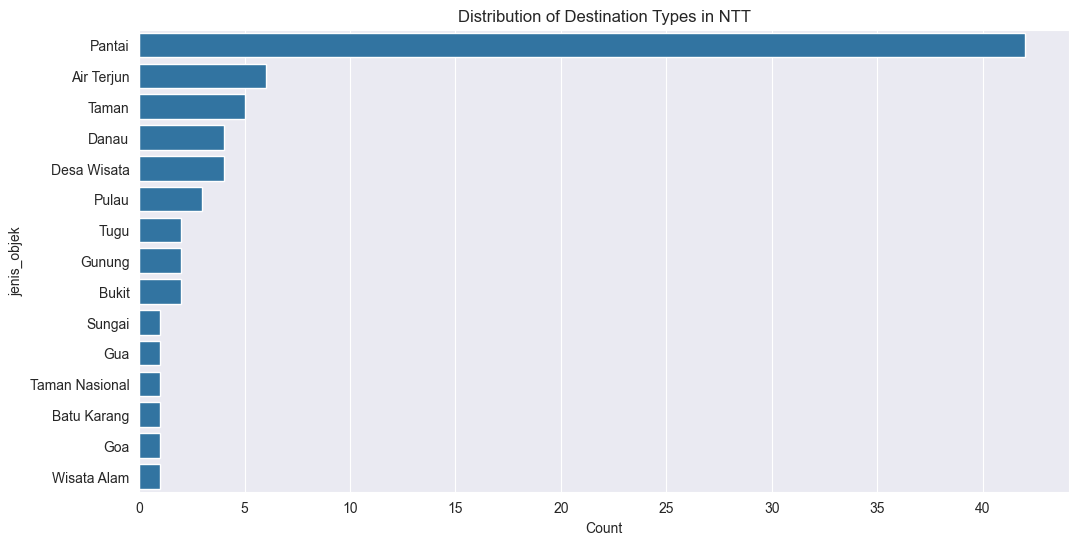

In [21]:
# Distribution of destination types
plt.figure(figsize=(12, 6))
destination_types = destinasi_df_clean['jenis_objek'].value_counts()
sns.barplot(x=destination_types.values, y=destination_types.index)
plt.title('Distribution of Destination Types in NTT')
plt.xlabel('Count')
plt.show()

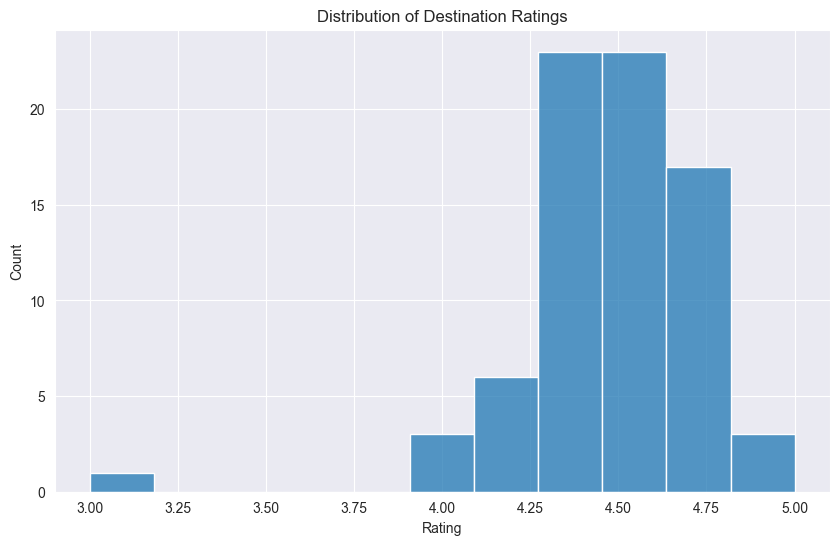

In [22]:
# Rating Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=destinasi_df_clean, x='Rating')
plt.title('Distribution of Destination Ratings')
plt.show()

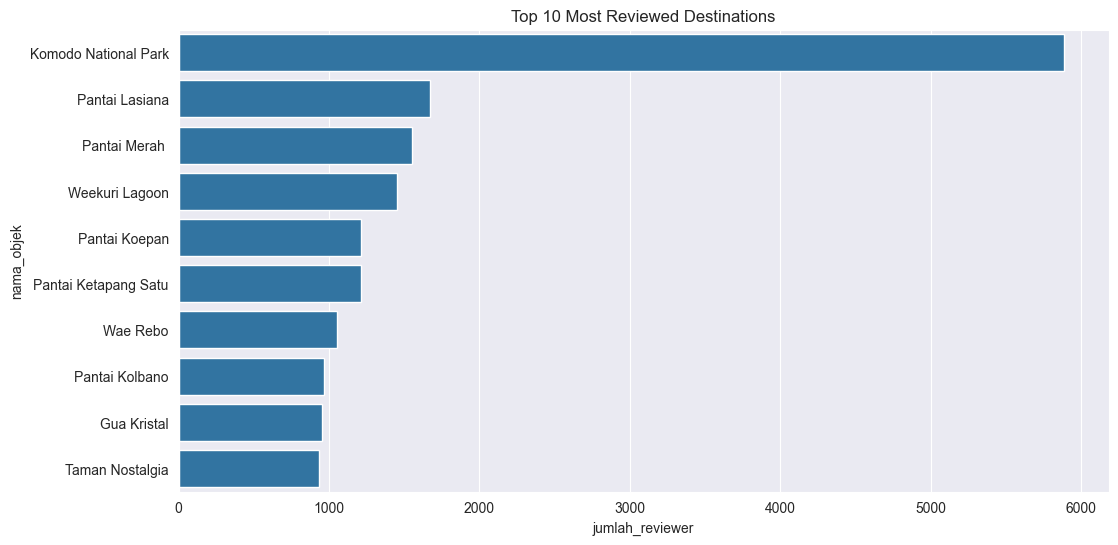

In [23]:
# Top 10 destinations by rating and number of reviews
top_destinations = destinasi_df_clean.nlargest(10, 'jumlah_reviewer')[['nama_objek', 'Rating', 'jumlah_reviewer']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_destinations, x='jumlah_reviewer', y='nama_objek')
plt.title('Top 10 Most Reviewed Destinations')
plt.show()


### Hotel 

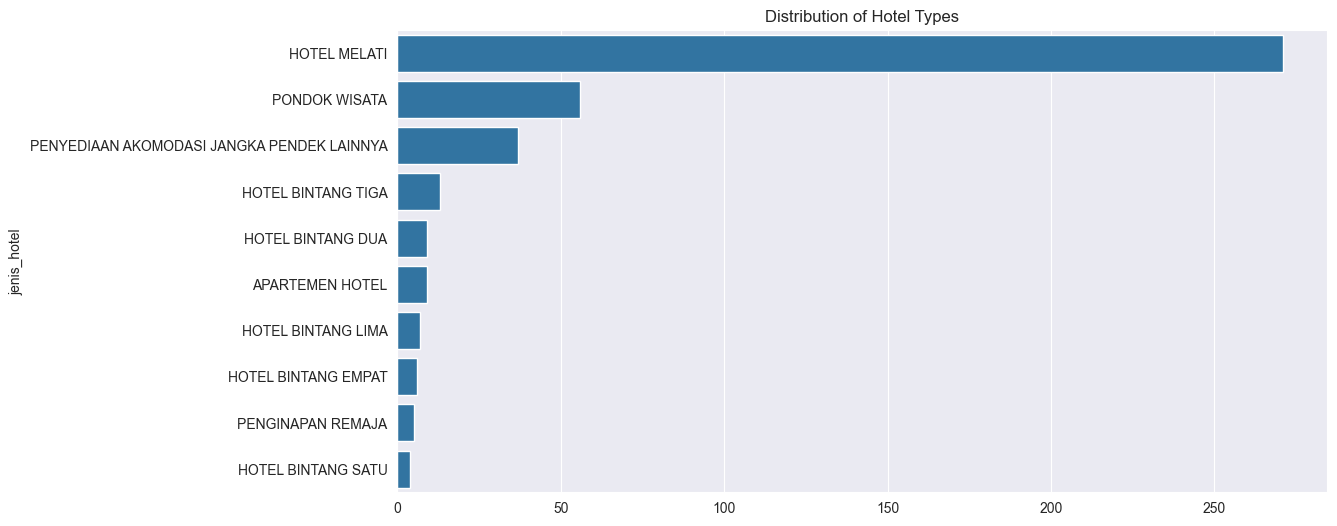

In [24]:
# Distribution of hotel types
plt.figure(figsize=(12, 6))
hotel_types = hotel_df_clean['jenis_hotel'].value_counts()
sns.barplot(x=hotel_types.values, y=hotel_types.index)
plt.title('Distribution of Hotel Types')
plt.show()

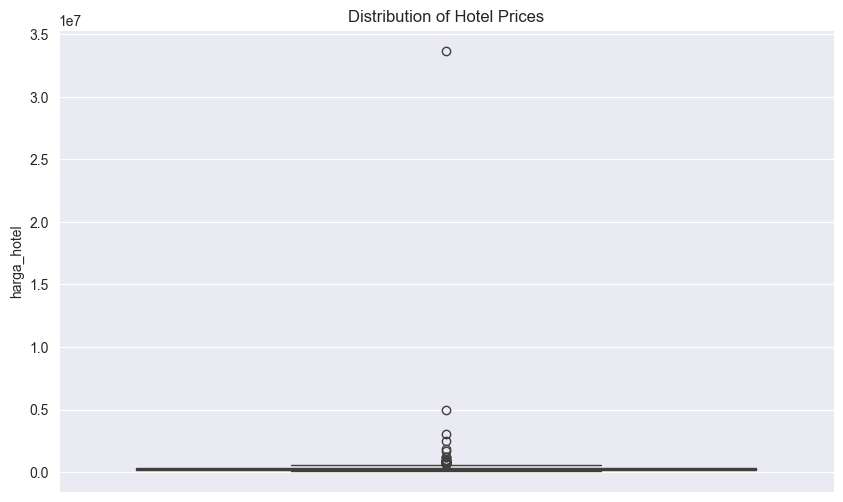

In [25]:
# Price Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_df_clean, y='harga_hotel')
plt.title('Distribution of Hotel Prices')
plt.show()

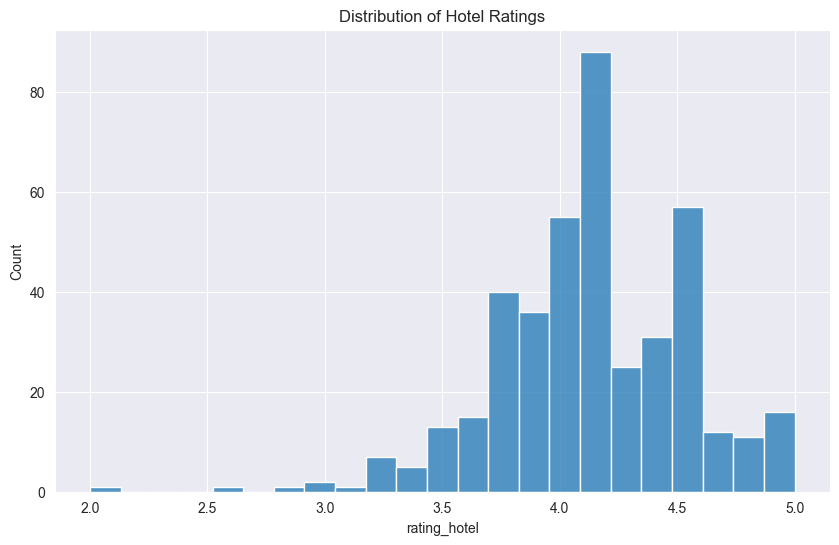

In [26]:
# Hotel ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=hotel_df_clean, x='rating_hotel')
plt.title('Distribution of Hotel Ratings')
plt.show()

### Regional Analysis

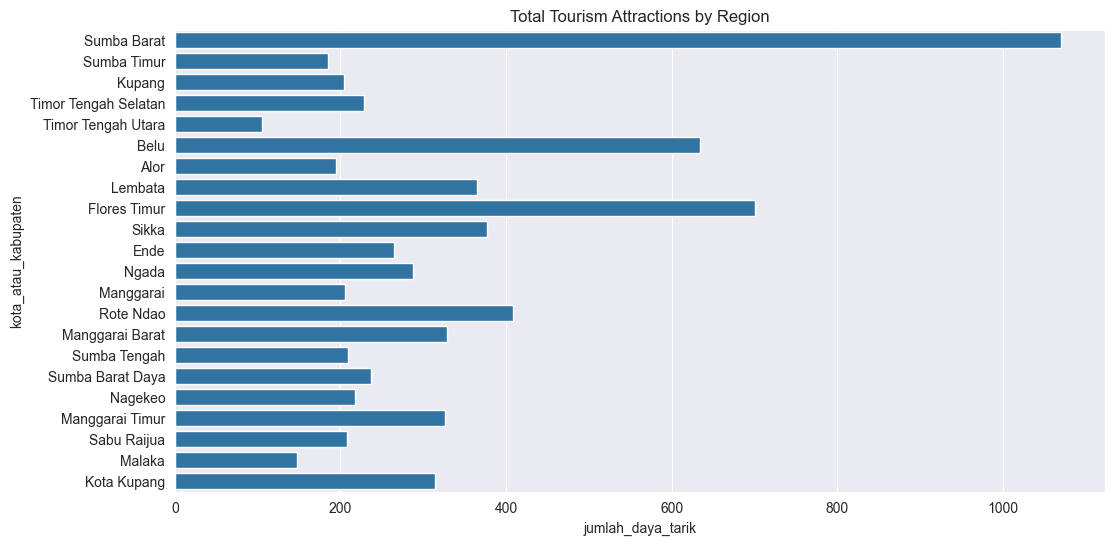

In [27]:
# Tourism attractions by region (2023)
plt.figure(figsize=(12, 6))
sns.barplot(data=daya_tarik_df, x='jumlah_daya_tarik', y='kota_atau_kabupaten')
plt.title('Total Tourism Attractions by Region')
plt.show()

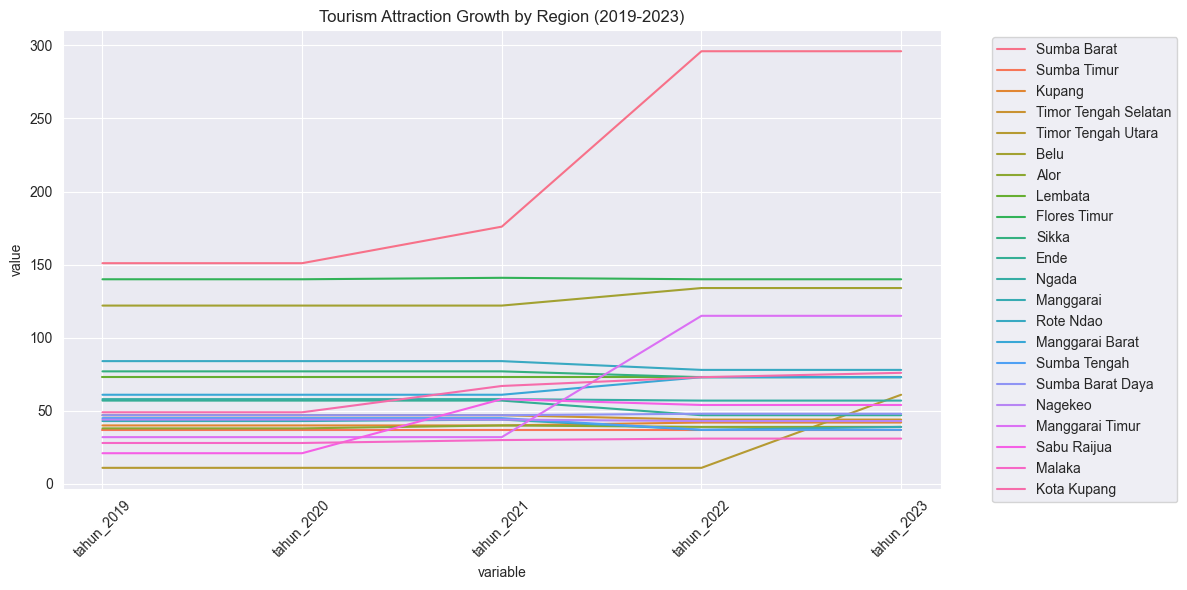

In [28]:
# Growth trend analysis
daya_tarik_growth = daya_tarik_df.melt(id_vars=['kota_atau_kabupaten'], 
                                      value_vars=['tahun_2019', 'tahun_2020', 'tahun_2021', 'tahun_2022', 'tahun_2023'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=daya_tarik_growth, x='variable', y='value', hue='kota_atau_kabupaten')
plt.title('Tourism Attraction Growth by Region (2019-2023)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

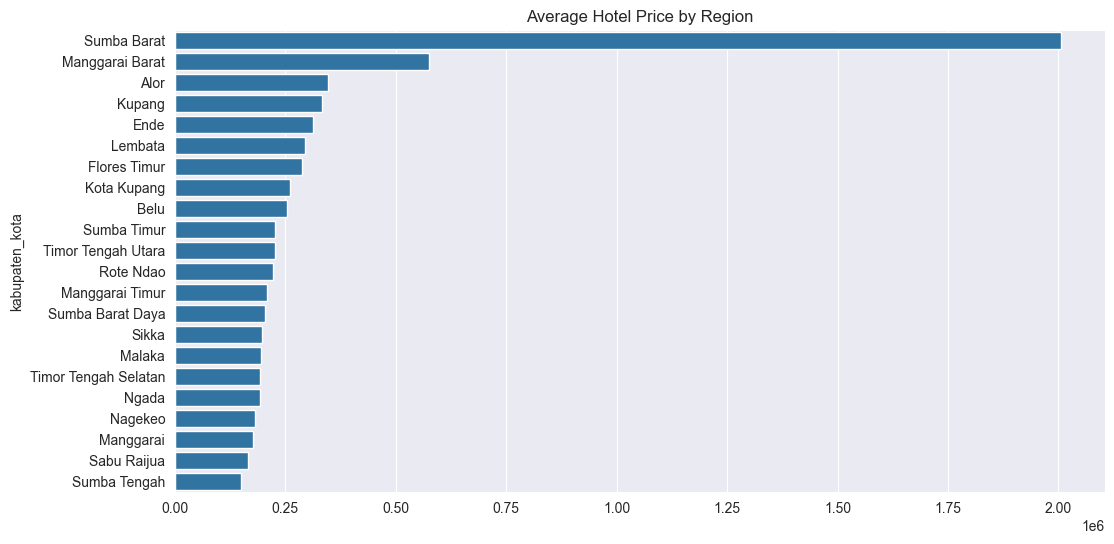

In [29]:
# Average hotel price by region
avg_price_by_region = hotel_df_clean.groupby('kabupaten_kota')['harga_hotel'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_region.values, y=avg_price_by_region.index)
plt.title('Average Hotel Price by Region')
plt.show()


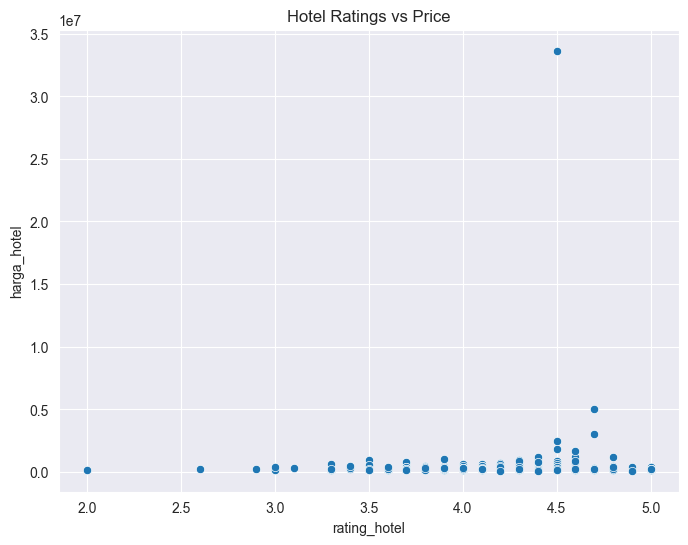

In [30]:
# Correlation between hotel ratings and price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hotel_df_clean, x='rating_hotel', y='harga_hotel')
plt.title('Hotel Ratings vs Price')
plt.show()


## Model

### Destination model

In [50]:
def categorize_destination_price(price):
    """Categorize destination prices into 4 categories"""
    if price == 0:
        return 0  # Free
    elif 0 < price <= 20000:
        return 1  # Affordable
    elif 20000 < price <= 50000:
        return 2  # Mid range
    else:
        return 3  # Premium

def categorize_hotel_price(price):
    """Categorize hotel prices into 4 categories"""
    if price <= 200000:
        return 0  # Affordable
    elif 200000 < price <= 500000:
        return 1  # Mid range
    elif 500000 < price <= 1000000:
        return 2  # High end
    else:
        return 3  # Premium

def clean_price(price_str):
    """Clean and convert price strings to numbers"""
    if isinstance(price_str, str):
        # Remove 'Rp', spaces, dots and handle ranges
        cleaned = price_str.replace('Rp', '').replace('.', '').replace(' ', '')
        if '-' in cleaned:
            # If there's a range, take the average
            parts = cleaned.split('-')
            try:
                low = float(parts[0])
                high = float(parts[1])
                return (low + high) / 2
            except:
                return 0
        try:
            return float(cleaned or 0)
        except:
            return 0
    return float(price_str or 0)

# Price Processing Functions for Tourism Recommendation System

## 1. Destination Price Categorization
```python
def categorize_destination_price(price):
    """Categorize destination prices into 4 categories"""
    if price == 0:
        return 0  # Free
    elif 0 < price <= 20000:
        return 1  # Affordable
    elif 20000 < price <= 50000:
        return 2  # Mid range
    else:
        return 3  # Premium
```

### Purpose:
Categorizes tourist destination prices into four distinct levels for easier comparison and recommendation:

* **Category 0 (Free)**: Cost is Rp 0
* **Category 1 (Affordable)**: Cost between Rp 1 - Rp 20,000
* **Category 2 (Mid Range)**: Cost between Rp 20,001 - Rp 50,000
* **Category 3 (Premium)**: Cost above Rp 50,000

## 2. Hotel Price Categorization
```python
def categorize_hotel_price(price):
    """Categorize hotel prices into 4 categories"""
    if price <= 200000:
        return 0  # Affordable
    elif 200000 < price <= 500000:
        return 1  # Mid range
    elif 500000 < price <= 1000000:
        return 2  # High end
    else:
        return 3  # Premium
```

### Purpose:
Categorizes hotel prices into four price ranges:

* **Category 0 (Affordable)**: Up to Rp 200,000
* **Category 1 (Mid Range)**: Rp 200,001 - Rp 500,000
* **Category 2 (High End)**: Rp 500,001 - Rp 1,000,000
* **Category 3 (Premium)**: Above Rp 1,000,000

## 3. Price String Cleaning
```python
def clean_price(price_str):
    """Clean and convert price strings to numbers"""
    if isinstance(price_str, str):
        cleaned = price_str.replace('Rp', '').replace('.', '').replace(' ', '')
        if '-' in cleaned:
            parts = cleaned.split('-')
            try:
                low = float(parts[0])
                high = float(parts[1])
                return (low + high) / 2
            except:
                return 0
        try:
            return float(cleaned or 0)
        except:
            return 0
    return float(price_str or 0)
```

### Purpose:
Processes and standardizes price data by:

1. **String Cleaning**:
   * Removes 'Rp' currency symbol
   * Removes thousand separators (dots)
   * Removes whitespace

2. **Range Handling**:
   * Detects price ranges (e.g., "5000-10000")
   * Calculates average of range bounds
   * Returns average as final price

3. **Error Handling**:
   * Returns 0 for invalid inputs
   * Handles both string and numeric inputs
   * Provides safe conversion to float

### Function Integration:
These functions work together in the preprocessing pipeline to:
1. Clean raw price data
2. Convert to numerical values
3. Categorize into appropriate price ranges
4. Prepare data for the recommendation model

In [51]:
def preprocess_data(destinasi_df, hotel_df):
    """Preprocess destination and hotel data"""
    
    # Create mapping dictionaries
    kabupaten_to_idx = {k: i for i, k in enumerate(destinasi_df['kabupaten_kota'].unique())}
    jenis_to_idx = {j: i for i, j in enumerate(destinasi_df['jenis_objek'].unique())}
    hotel_type_to_idx = {h: i for i, h in enumerate(hotel_df['jenis_hotel'].unique())}
    
    # Encode categorical features
    destinasi_df['kabupaten_encoded'] = destinasi_df['kabupaten_kota'].map(kabupaten_to_idx)
    destinasi_df['jenis_encoded'] = destinasi_df['jenis_objek'].map(jenis_to_idx)
    
    # Process prices
    destinasi_df['price_clean'] = destinasi_df['estimasi_harga_tiket'].apply(clean_price)
    hotel_df['price_clean'] = hotel_df['harga_hotel'].apply(clean_price)
    
    # Categorize prices
    destinasi_df['price_category'] = destinasi_df['price_clean'].apply(categorize_destination_price)
    hotel_df['price_category'] = hotel_df['price_clean'].apply(categorize_hotel_price)
    
    # Normalize prices
    destinasi_df['price_normalized'] = destinasi_df['price_category'] / 3
    hotel_df['price_normalized'] = hotel_df['price_category'] / 3
    
    # Process ratings
    destinasi_df['Rating'] = destinasi_df['Rating'].astype(str).str.replace(',', '.').astype(float)
    destinasi_df['rating_normalized'] = (destinasi_df['Rating'] - destinasi_df['Rating'].min()) / \
                                      (destinasi_df['Rating'].max() - destinasi_df['Rating'].min())
    
    # Normalize reviews
    destinasi_df['reviews_normalized'] = (destinasi_df['jumlah_reviewer'] - destinasi_df['jumlah_reviewer'].min()) / \
                                       (destinasi_df['jumlah_reviewer'].max() - destinasi_df['jumlah_reviewer'].min())
    
    # Process hotels data
    hotel_df['kabupaten_encoded'] = hotel_df['kabupaten_kota'].map(kabupaten_to_idx)
    hotel_df['jenis_encoded'] = hotel_df['jenis_hotel'].map(hotel_type_to_idx)
    
    # Add category names
    destinasi_df['price_category_name'] = destinasi_df['price_category'].map({
        0: 'Free',
        1: 'Affordable',
        2: 'Mid Range',
        3: 'Premium'
    })
    
    hotel_df['price_category_name'] = hotel_df['price_category'].map({
        0: 'Affordable',
        1: 'Mid Range',
        2: 'High End',
        3: 'Premium'
    })
    
    return destinasi_df, hotel_df, kabupaten_to_idx, jenis_to_idx, hotel_type_to_idx

# Data Preprocessing Function Explanation

## Function Overview
```python
def preprocess_data(destinasi_df, hotel_df):
    """Preprocess destination and hotel data"""
```
Main function that takes two dataframes (destinations and hotels) as input and processes them for the recommendation model.

## 1. Creating Mapping Dictionaries
```python
kabupaten_to_idx = {k: i for i, k in enumerate(destinasi_df['kabupaten_kota'].unique())}
jenis_to_idx = {j: i for i, j in enumerate(destinasi_df['jenis_objek'].unique())}
hotel_type_to_idx = {h: i for i, h in enumerate(hotel_df['jenis_hotel'].unique())}
```
* Creates dictionaries to map categorical values to numerical indices
* Each unique value gets a unique number (0, 1, 2, etc.)
* Used for converting text categories to numbers that the model can process

## 2. Encoding Categorical Features
```python
destinasi_df['kabupaten_encoded'] = destinasi_df['kabupaten_kota'].map(kabupaten_to_idx)
destinasi_df['jenis_encoded'] = destinasi_df['jenis_objek'].map(jenis_to_idx)
```
* Converts location names and destination types to their numerical codes
* Uses the mapping dictionaries created above
* Creates new columns with encoded values

## 3. Processing Prices
```python
destinasi_df['price_clean'] = destinasi_df['estimasi_harga_tiket'].apply(clean_price)
hotel_df['price_clean'] = hotel_df['harga_hotel'].apply(clean_price)
```
* Cleans price data using the clean_price function
* Removes currency symbols, handles ranges
* Creates standardized price values

## 4. Categorizing Prices
```python
destinasi_df['price_category'] = destinasi_df['price_clean'].apply(categorize_destination_price)
hotel_df['price_category'] = hotel_df['price_clean'].apply(categorize_hotel_price)
```
* Assigns price categories (0-3) based on price ranges
* Uses separate categorization for destinations and hotels
* Creates categorical price levels

## 5. Normalizing Prices
```python
destinasi_df['price_normalized'] = destinasi_df['price_category'] / 3
hotel_df['price_normalized'] = hotel_df['price_category'] / 3
```
* Converts price categories to values between 0 and 1
* Divides by 3 (max category value) for normalization
* Makes price values suitable for model training

## 6. Processing Ratings
```python
destinasi_df['Rating'] = destinasi_df['Rating'].astype(str).str.replace(',', '.').astype(float)
destinasi_df['rating_normalized'] = (destinasi_df['Rating'] - destinasi_df['Rating'].min()) / \
                                  (destinasi_df['Rating'].max() - destinasi_df['Rating'].min())
```
* Converts ratings to proper numerical format
* Replaces decimal commas with dots
* Normalizes ratings to range 0-1 using min-max scaling

## 7. Normalizing Reviews
```python
destinasi_df['reviews_normalized'] = (destinasi_df['jumlah_reviewer'] - destinasi_df['jumlah_reviewer'].min()) / \
                                   (destinasi_df['jumlah_reviewer'].max() - destinasi_df['jumlah_reviewer'].min())
```
* Normalizes number of reviews to range 0-1
* Uses min-max scaling
* Makes review counts comparable across destinations

## 8. Processing Hotel Data
```python
hotel_df['kabupaten_encoded'] = hotel_df['kabupaten_kota'].map(kabupaten_to_idx)
hotel_df['jenis_encoded'] = hotel_df['jenis_hotel'].map(hotel_type_to_idx)
```
* Encodes hotel locations and types
* Uses same location encoding as destinations
* Creates consistent encoding across datasets

## 9. Adding Category Names
```python
destinasi_df['price_category_name'] = destinasi_df['price_category'].map({
    0: 'Free',
    1: 'Affordable',
    2: 'Mid Range',
    3: 'Premium'
})

hotel_df['price_category_name'] = hotel_df['price_category'].map({
    0: 'Affordable',
    1: 'Mid Range',
    2: 'High End',
    3: 'Premium'
})
```
* Adds readable names for price categories
* Different naming schemes for destinations and hotels
* Makes output more user-friendly

## 10. Return Values
```python
return destinasi_df, hotel_df, kabupaten_to_idx, jenis_to_idx, hotel_type_to_idx
```
* Returns processed dataframes and mapping dictionaries
* Mapping dictionaries needed for later encoding
* Maintains data consistency throughout the system

In [52]:
def create_recommendation_model(num_kabupaten, num_jenis_wisata, num_hotel_types):
    # Embeddings
    kabupaten_embedding = layers.Embedding(num_kabupaten, 64)
    jenis_embedding = layers.Embedding(num_jenis_wisata, 32)
    hotel_type_embedding = layers.Embedding(num_hotel_types, 32)
    
    # Input layers
    destination_input = layers.Input(shape=(1,), name='destination_kabupaten')
    destination_jenis = layers.Input(shape=(1,), name='destination_jenis')
    destination_price = layers.Input(shape=(1,), name='destination_price')
    destination_rating = layers.Input(shape=(1,), name='destination_rating')
    destination_reviews = layers.Input(shape=(1,), name='destination_reviews')
    
    # Process embeddings
    dest_kab_embed = layers.Flatten()(kabupaten_embedding(destination_input))
    dest_jenis_embed = layers.Flatten()(jenis_embedding(destination_jenis))
    
    # Combine features
    dest_features = layers.Concatenate()([
        dest_kab_embed,
        dest_jenis_embed,
        destination_price,
        destination_rating,
        destination_reviews
    ])
    
    # Main network
    x = layers.BatchNormalization()(dest_features)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    # Residual blocks
    for _ in range(2):
        res = layers.Dense(256, activation='relu')(x)
        res = layers.BatchNormalization()(res)
        res = layers.Dropout(0.3)(res)
        res = layers.Dense(256, activation='relu')(res)
        x = layers.Add()([x, res])
    
    # Output branches
    dest_output = layers.Dense(1, activation='sigmoid', name='destination_output')(
        layers.Dense(64, activation='relu')(
            layers.Dense(128, activation='relu')(x)
        )
    )
    
    hotel_output = layers.Dense(1, activation='sigmoid', name='hotel_output')(
        layers.Dense(64, activation='relu')(
            layers.Dense(128, activation='relu')(x)
        )
    )
    
    # Create model
    model = Model(
        inputs=[
            destination_input,
            destination_jenis,
            destination_price,
            destination_rating,
            destination_reviews
        ],
        outputs=[dest_output, hotel_output]
    )
    
    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss={
            'destination_output': 'binary_crossentropy',
            'hotel_output': 'binary_crossentropy'
        },
        metrics=['accuracy'],
        loss_weights={'destination_output': 1.0, 'hotel_output': 1.0}
    )
    
    return model

# Execute preprocessing and create model
print("Starting preprocessing...")
preprocessed_df, hotel_df_processed, kabupaten_to_idx, jenis_to_idx, hotel_type_to_idx = preprocess_data(destinasi_df_clean, hotel_df_clean)

print("\nCreating model...")
model = create_recommendation_model(
    num_kabupaten=len(kabupaten_to_idx),
    num_jenis_wisata=len(jenis_to_idx),
    num_hotel_types=len(hotel_type_to_idx)
)

print("\nModel created successfully!")

Starting preprocessing...

Creating model...

Model created successfully!


# Recommendation Model Architecture Explanation

## 1. Model Function Definition
```python
def create_recommendation_model(num_kabupaten, num_jenis_wisata, num_hotel_types):
```
* Creates the hybrid recommendation model
* Takes counts of unique categories as parameters
* Returns compiled model ready for training

## 2. Embedding Layers
```python
kabupaten_embedding = layers.Embedding(num_kabupaten, 64)
jenis_embedding = layers.Embedding(num_jenis_wisata, 32)
hotel_type_embedding = layers.Embedding(num_hotel_types, 32)
```
* Creates dense vectors for categorical data
* Kabupaten (location) uses 64-dimensional space
* Destination and hotel types use 32-dimensional space
* Converts categorical indices to learned vector representations

## 3. Input Layers
```python
destination_input = layers.Input(shape=(1,), name='destination_kabupaten')
destination_jenis = layers.Input(shape=(1,), name='destination_jenis')
destination_price = layers.Input(shape=(1,), name='destination_price')
destination_rating = layers.Input(shape=(1,), name='destination_rating')
destination_reviews = layers.Input(shape=(1,), name='destination_reviews')
```
* Defines input shape for each feature
* Each input takes a single value (shape=(1,))
* Named inputs for better model understanding
* Handles both categorical and numerical inputs

## 4. Process Embeddings
```python
dest_kab_embed = layers.Flatten()(kabupaten_embedding(destination_input))
dest_jenis_embed = layers.Flatten()(jenis_embedding(destination_jenis))
```
* Applies embedding layers to categorical inputs
* Flattens embedded vectors for further processing
* Converts categorical data to learned numerical representations

## 5. Feature Combination
```python
dest_features = layers.Concatenate()([
    dest_kab_embed,
    dest_jenis_embed,
    destination_price,
    destination_rating,
    destination_reviews
])
```
* Combines all features into single vector
* Concatenates embedded and numerical features
* Creates unified representation for processing

## 6. Main Network
```python
x = layers.BatchNormalization()(dest_features)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
```
* Normalizes combined features
* Applies dense layer with ReLU activation
* Uses dropout for regularization
* Processes feature interactions

## 7. Residual Blocks
```python
for _ in range(2):
    res = layers.Dense(256, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dropout(0.3)(res)
    res = layers.Dense(256, activation='relu')(res)
    x = layers.Add()([x, res])
```
* Creates two residual blocks
* Each block has two dense layers
* Includes batch normalization and dropout
* Adds residual connections for better gradient flow

## 8. Output Branches
```python
dest_output = layers.Dense(1, activation='sigmoid', name='destination_output')(
    layers.Dense(64, activation='relu')(
        layers.Dense(128, activation='relu')(x)
    )
)

hotel_output = layers.Dense(1, activation='sigmoid', name='hotel_output')(
    layers.Dense(64, activation='relu')(
        layers.Dense(128, activation='relu')(x)
    )
)
```
* Creates separate outputs for destinations and hotels
* Each branch has three dense layers
* Uses sigmoid activation for final prediction
* Reduces dimensionality gradually (128 → 64 → 1)

## 9. Model Creation
```python
model = Model(
    inputs=[
        destination_input,
        destination_jenis,
        destination_price,
        destination_rating,
        destination_reviews
    ],
    outputs=[dest_output, hotel_output]
)
```
* Creates Keras Model instance
* Specifies all inputs and outputs
* Defines model architecture structure

## 10. Model Compilation
```python
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'destination_output': 'binary_crossentropy',
        'hotel_output': 'binary_crossentropy'
    },
    metrics=['accuracy'],
    loss_weights={'destination_output': 1.0, 'hotel_output': 1.0}
)
```
* Configures model for training
* Uses Adam optimizer with 0.001 learning rate
* Binary crossentropy loss for both outputs
* Tracks accuracy metric
* Equal weights for both tasks

## 11. Model Creation Execution
```python
model = create_recommendation_model(
    num_kabupaten=len(kabupaten_to_idx),
    num_jenis_wisata=len(jenis_to_idx),
    num_hotel_types=len(hotel_type_to_idx)
)
```
* Creates model instance with proper dimensions
* Uses counts from preprocessing
* Initializes all layers and connections

Starting training process...
Preparing training data...
Training model...
Epoch 1/50
250/250 [==============================] - 5s 9ms/step - loss: 0.8496 - destination_output_loss: 0.5069 - hotel_output_loss: 0.3426 - destination_output_accuracy: 0.7641 - hotel_output_accuracy: 0.8850 - val_loss: 0.9823 - val_destination_output_loss: 0.6050 - val_hotel_output_loss: 0.3774 - val_destination_output_accuracy: 0.7740 - val_hotel_output_accuracy: 0.8885 - lr: 9.7411e-04
Epoch 2/50
 17/250 [=>............................] - ETA: 1s - loss: 0.8464 - destination_output_loss: 0.4988 - hotel_output_loss: 0.3476 - destination_output_accuracy: 0.7647 - hotel_output_accuracy: 0.8741

/Users/bashkoro/DataspellProjects/Travelmate/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 2s 8ms/step - loss: 0.8277 - destination_output_loss: 0.4960 - hotel_output_loss: 0.3317 - destination_output_accuracy: 0.7690 - hotel_output_accuracy: 0.8868 - val_loss: 0.8295 - val_destination_output_loss: 0.5051 - val_hotel_output_loss: 0.3244 - val_destination_output_accuracy: 0.7740 - val_hotel_output_accuracy: 0.8885 - lr: 9.4878e-04
Epoch 3/50
250/250 [==============================] - 2s 9ms/step - loss: 0.8204 - destination_output_loss: 0.4915 - hotel_output_loss: 0.3289 - destination_output_accuracy: 0.7695 - hotel_output_accuracy: 0.8868 - val_loss: 0.8154 - val_destination_output_loss: 0.4903 - val_hotel_output_loss: 0.3252 - val_destination_output_accuracy: 0.7740 - val_hotel_output_accuracy: 0.8885 - lr: 9.2412e-04
Epoch 4/50
250/250 [==============================] - 2s 9ms/step - loss: 0.8185 - destination_output_loss: 0.4912 - hotel_output_loss: 0.3273 - destination_output_accuracy: 0.7692 - hotel_output_accuracy: 0.8868 - va

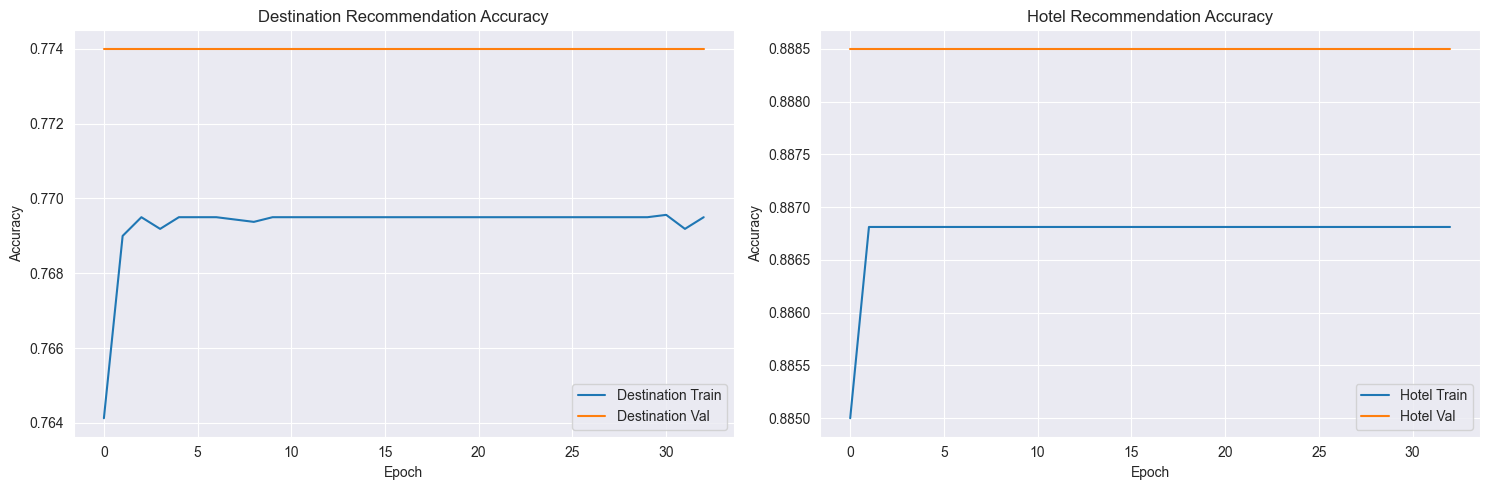


Final Metrics:
Destination Recommendation:
Training Accuracy: 0.7695
Validation Accuracy: 0.7740

Hotel Recommendation:
Training Accuracy: 0.8868
Validation Accuracy: 0.8885
Training complete!


In [53]:
def prepare_training_data(destinasi_df, hotel_df, num_samples=20000):
    """Prepare training data for the model"""
    n_destinations = len(destinasi_df)
    
    # Initialize scaler
    scaler = MinMaxScaler()
    
    # Generate indices for source destinations
    source_indices = np.random.randint(0, n_destinations, num_samples)
    dest_indices = np.random.randint(0, n_destinations, num_samples)
    
    # Get destination features
    source_kabupaten = destinasi_df['kabupaten_encoded'].values[source_indices]
    source_jenis = destinasi_df['jenis_encoded'].values[source_indices]
    source_price = destinasi_df['price_normalized'].values[source_indices]
    source_rating = destinasi_df['rating_normalized'].values[source_indices]
    source_reviews = destinasi_df['reviews_normalized'].values[source_indices]
    
    # Generate labels with sophisticated matching criteria
    dest_labels = np.zeros(num_samples)
    hotel_labels = np.zeros(num_samples)
    
    for i in range(num_samples):
        # Calculate similarity score based on multiple factors
        kabupaten_match = destinasi_df['kabupaten_encoded'].values[source_indices[i]] == destinasi_df['kabupaten_encoded'].values[dest_indices[i]]
        jenis_match = destinasi_df['jenis_encoded'].values[source_indices[i]] == destinasi_df['jenis_encoded'].values[dest_indices[i]]
        price_diff = abs(destinasi_df['price_normalized'].values[source_indices[i]] - destinasi_df['price_normalized'].values[dest_indices[i]])
        rating_diff = abs(destinasi_df['rating_normalized'].values[source_indices[i]] - destinasi_df['rating_normalized'].values[dest_indices[i]])
        
        # Weighted similarity score
        similarity_score = 0
        if kabupaten_match:
            similarity_score += 0.4  # Location is important
        if jenis_match:
            similarity_score += 0.3  # Type of destination is important
        if price_diff < 0.2:
            similarity_score += 0.2  # Similar price range
        if rating_diff < 0.2:
            similarity_score += 0.1  # Similar rating
            
        dest_labels[i] = 1 if similarity_score >= 0.5 else 0
        hotel_labels[i] = 1 if kabupaten_match else 0
    
    return [
        source_kabupaten,
        source_jenis,
        source_price,
        source_rating,
        source_reviews
    ], [dest_labels, hotel_labels]

def train_and_evaluate_model(model, train_data, train_labels, epochs=100, batch_size=64):
    """Train and evaluate the model"""
    
    # Split data
    train_data_split = []
    val_data_split = []
    for data in train_data:
        x_train, x_val = train_test_split(data, test_size=0.2, random_state=42)
        train_data_split.append(x_train)
        val_data_split.append(x_val)
    
    train_labels_split = []
    val_labels_split = []
    for label in train_labels:
        y_train, y_val = train_test_split(label, test_size=0.2, random_state=42)
        train_labels_split.append(y_train)
        val_labels_split.append(y_val)
    
    # Custom learning rate scheduler
    initial_learning_rate = 0.001
    decay_steps = 1000
    decay_rate = 0.9
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps, decay_rate
    )
    
    # Compile model with scheduled learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
        loss={
            'destination_output': 'binary_crossentropy',
            'hotel_output': 'binary_crossentropy'
        },
        metrics=['accuracy'],
        loss_weights={
            'destination_output': 1.0,
            'hotel_output': 1.0
        }
    )
    
    # Train with callbacks
    history = model.fit(
        train_data_split,
        train_labels_split,
        validation_data=(val_data_split, val_labels_split),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=0.00001
            ),
            tf.keras.callbacks.ModelCheckpoint(
                'best_model.h5',
                monitor='val_loss',
                save_best_only=True
            )
        ],
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    # Plot destination metrics
    plt.subplot(1, 2, 1)
    plt.plot(history.history['destination_output_accuracy'], label='Destination Train')
    plt.plot(history.history['val_destination_output_accuracy'], label='Destination Val')
    plt.title('Destination Recommendation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot hotel metrics
    plt.subplot(1, 2, 2)
    plt.plot(history.history['hotel_output_accuracy'], label='Hotel Train')
    plt.plot(history.history['val_hotel_output_accuracy'], label='Hotel Val')
    plt.title('Hotel Recommendation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print("\nFinal Metrics:")
    print("Destination Recommendation:")
    print(f"Training Accuracy: {history.history['destination_output_accuracy'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_destination_output_accuracy'][-1]:.4f}")
    print("\nHotel Recommendation:")
    print(f"Training Accuracy: {history.history['hotel_output_accuracy'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_hotel_output_accuracy'][-1]:.4f}")
    
    return model, history

# Execute training
print("Starting training process...")

# Create training data
print("Preparing training data...")
train_data, train_labels = prepare_training_data(preprocessed_df, hotel_df_processed)

# Train model
print("Training model...")
trained_model, history = train_and_evaluate_model(
    model,
    train_data,
    train_labels,
    epochs=50,
    batch_size=64
)

# Save the model
trained_model.save('destination_models.h5')
print("Training complete!")

# Training Functions and Process Explanation

## 1. Data Preparation Function
```python
def prepare_training_data(destinasi_df, hotel_df, num_samples=20000):
```
### Parameters:
* Takes preprocessed destination and hotel dataframes
* Number of training samples (default: 20,000)

### Data Generation:
```python
source_indices = np.random.randint(0, n_destinations, num_samples)
dest_indices = np.random.randint(0, n_destinations, num_samples)
```
* Randomly generates indices for destination pairs
* Creates training samples for similarity learning

### Feature Extraction:
```python
source_kabupaten = destinasi_df['kabupaten_encoded'].values[source_indices]
source_jenis = destinasi_df['jenis_encoded'].values[source_indices]
source_price = destinasi_df['price_normalized'].values[source_indices]
source_rating = destinasi_df['rating_normalized'].values[source_indices]
source_reviews = destinasi_df['reviews_normalized'].values[source_indices]
```
* Extracts encoded and normalized features
* Uses random indices to select destinations
* Creates feature arrays for training

### Similarity Scoring:
```python
similarity_score = 0
if kabupaten_match:
    similarity_score += 0.4  # Location is important
if jenis_match:
    similarity_score += 0.3  # Type of destination is important
if price_diff < 0.2:
    similarity_score += 0.2  # Similar price range
if rating_diff < 0.2:
    similarity_score += 0.1  # Similar rating
```
* Calculates similarity between destinations
* Weighted scoring system:
  - Location: 40%
  - Type: 30%
  - Price: 20%
  - Rating: 10%

## 2. Training and Evaluation Function
```python
def train_and_evaluate_model(model, train_data, train_labels, epochs=100, batch_size=64):
```

### Data Splitting:
```python
x_train, x_val = train_test_split(data, test_size=0.2, random_state=42)
```
* Splits data into training (80%) and validation (20%)
* Uses consistent random seed for reproducibility

### Learning Rate Schedule:
```python
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)
```
* Starts with 0.001 learning rate
* Decays every 1000 steps
* Decay rate of 0.9

### Training Callbacks:
```python
callbacks=[
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
]
```
* Early Stopping: Prevents overfitting
* Learning Rate Reduction: Adapts learning rate
* Model Checkpoint: Saves best model version

### Visualization:
```python
plt.figure(figsize=(15, 5))
# Plot destination and hotel metrics
```
* Creates training progress plots
* Shows accuracy for both tasks
* Displays training vs validation performance

### Training Execution:
```python
trained_model, history = train_and_evaluate_model(
    model,
    train_data,
    train_labels,
    epochs=50,
    batch_size=64
)
```
* Trains for 50 epochs
* Uses batch size of 64
* Returns trained model and training history

### Model Saving:
```python
trained_model.save('destination_models.h5')
```
* Saves trained model to disk
* Uses H5 format for storage
* Preserves model architecture and weights

In [54]:
# Testing and Recommendation Functions
def get_user_preferences(kabupaten, jenis_wisata, budget_preference):
    """Convert user preferences to model input format
    budget_preference: 0 (free) to 1 (premium)
    """
    return (
        kabupaten_to_idx[kabupaten],
        jenis_to_idx[jenis_wisata],
        float(budget_preference)
    )

def get_destination_recommendations(model, user_prefs, preprocessed_df, top_n=5):
    """Get destination recommendations based on user preferences"""
    kabupaten_idx, jenis_idx, price_pref = user_prefs
    
    # Prepare input arrays
    n_destinations = len(preprocessed_df)
    user_kabupaten = np.full(n_destinations, kabupaten_idx)
    user_jenis = np.full(n_destinations, jenis_idx)
    user_price = np.full(n_destinations, price_pref)
    
    # Get predictions
    dest_predictions, _ = model.predict([
        user_kabupaten,
        user_jenis,
        user_price,
        preprocessed_df['rating_normalized'].values,
        preprocessed_df['reviews_normalized'].values
    ])
    
    # Get top recommendations
    top_indices = dest_predictions.flatten().argsort()[-top_n:][::-1]
    recommendations = preprocessed_df.iloc[top_indices]
    
    return recommendations

def get_similar_destinations(model, source_destination, preprocessed_df, top_n=5):
    """Get similar destinations to a given destination"""
    # Prepare input features
    n_destinations = len(preprocessed_df)
    source_inputs = [
        np.full(n_destinations, source_destination['kabupaten_encoded']),
        np.full(n_destinations, source_destination['jenis_encoded']),
        np.full(n_destinations, source_destination['price_normalized']),
        preprocessed_df['rating_normalized'].values,
        preprocessed_df['reviews_normalized'].values
    ]
    
    # Get predictions
    dest_predictions, _ = model.predict(source_inputs)
    
    # Get top similar destinations (excluding the source)
    similar_indices = dest_predictions.flatten().argsort()[-top_n-1:][::-1]
    similar_indices = similar_indices[similar_indices != source_destination.name]
    similar_destinations = preprocessed_df.iloc[similar_indices[:top_n]]
    
    return similar_destinations

def get_hotel_recommendations(destination, hotel_df_processed, top_n=5):
    """Get hotel recommendations near a destination"""
    # Filter hotels in the same kabupaten
    local_hotels = hotel_df_processed[
        hotel_df_processed['kabupaten_kota'] == destination['kabupaten_kota']
    ]
    
    if len(local_hotels) == 0:
        return pd.DataFrame()
    
    # Sort by rating and price
    recommended_hotels = local_hotels.sort_values(
        by=['rating_hotel', 'price_normalized'],
        ascending=[False, True]
    ).head(top_n)
    
    return recommended_hotels

def print_destination_info(destination):
    """Helper function to print destination information"""
    print(f"\n🏖️  {destination['nama_objek']}")
    print(f"   Type: {destination['jenis_objek']}")
    print(f"   Location: {destination['kabupaten_kota']}")
    print(f"   Rating: {destination['Rating']} ({destination['jumlah_reviewer']} reviews)")
    print(f"   Price Category: {destination['price_category_name']}")

def print_hotel_info(hotel):
    """Helper function to print hotel information"""
    print(f"\n🏨  {hotel['nama_hotel']}")
    print(f"   Type: {hotel['jenis_hotel']}")
    print(f"   Location: {hotel['kabupaten_kota']}")
    print(f"   Rating: {hotel['rating_hotel']} ({hotel['jumlah_reviewer']} reviews)")
    print(f"   Price Category: {hotel['price_category_name']}")

# Test the recommendations
print("=== Testing Recommendation System ===")

# 1. Test user preferences-based recommendations
print("\n1. Testing User Preference Recommendations")
test_preferences = [
    ("Kupang", "Pantai", 0.2),           # Affordable beaches in Kupang
    ("Manggarai Barat", "Pantai", 0.8),  # Premium beaches in Manggarai Barat
    ("Ende", "Air Terjun", 0.5),         # Mid-range waterfalls in Ende
    ("Kota Kupang", "Taman", 0.1)        # Budget-friendly parks in Kota Kupang
]

for location, type_pref, price_pref in test_preferences:
    print(f"\nFinding destinations for preferences:")
    print(f"Location: {location}")
    print(f"Type: {type_pref}")
    print(f"Price Level: {price_pref:.1f}")
    
    user_prefs = get_user_preferences(location, type_pref, price_pref)
    recommendations = get_destination_recommendations(
        trained_model,
        user_prefs,
        preprocessed_df,
        top_n=3
    )
    
    print("\nRecommended destinations:")
    for _, dest in recommendations.iterrows():
        print_destination_info(dest)

# 2. Test similar destinations
print("\n2. Testing Similar Destinations")
test_destinations = preprocessed_df.sample(n=2)  # Test with 2 random destinations

for _, dest in test_destinations.iterrows():
    print(f"\nFinding similar destinations to: {dest['nama_objek']}")
    similar_places = get_similar_destinations(
        trained_model,
        dest,
        preprocessed_df,
        top_n=3
    )
    
    print("\nSimilar destinations:")
    for _, similar_dest in similar_places.iterrows():
        print_destination_info(similar_dest)

# 3. Test hotel recommendations
print("\n3. Testing Hotel Recommendations")
test_destinations = preprocessed_df.sample(n=2)  # Test with 2 random destinations

for _, dest in test_destinations.iterrows():
    print(f"\nFinding hotels near: {dest['nama_objek']}")
    hotels = get_hotel_recommendations(
        dest,
        hotel_df_processed,
        top_n=3
    )
    
    if len(hotels) > 0:
        print("\nRecommended hotels:")
        for _, hotel in hotels.iterrows():
            print_hotel_info(hotel)
    else:
        print("No hotels found in this area.")

print("\n=== Testing Complete ===")

=== Testing Recommendation System ===

1. Testing User Preference Recommendations

Finding destinations for preferences:
Location: Kupang
Type: Pantai
Price Level: 0.2
3/3 [==============================] - 0s 3ms/step

Recommended destinations:

🏖️  Pantai Mauwellu
   Type: Pantai
   Location: Nagekeo
   Rating: 3.0 (4 reviews)
   Price Category: Free

🏖️  Taman Rekreasi Gua Monyet
   Type: Taman
   Location: Kota Kupang
   Rating: 4.0 (289 reviews)
   Price Category: Free

🏖️  Air Terjun Oenesu
   Type: Air Terjun
   Location: Kupang
   Rating: 4.0 (118 reviews)
   Price Category: Affordable

Finding destinations for preferences:
Location: Manggarai Barat
Type: Pantai
Price Level: 0.8
3/3 [==============================] - 0s 3ms/step

Recommended destinations:

🏖️  Pantai Mauwellu
   Type: Pantai
   Location: Nagekeo
   Rating: 3.0 (4 reviews)
   Price Category: Free

🏖️  Air Terjun Oenesu
   Type: Air Terjun
   Location: Kupang
   Rating: 4.0 (117 reviews)
   Price Category: Afford

# Testing and Recommendation Functions Explanation

## 1. User Preference Function
```python
def get_user_preferences(kabupaten, jenis_wisata, budget_preference):
```
* Converts user inputs to model format
* Maps location and destination type to indices
* Takes budget preference (0-1 scale)
* Returns tuple of encoded preferences

## 2. Destination Recommendation Function
```python
def get_destination_recommendations(model, user_prefs, preprocessed_df, top_n=5):
```
### Input Processing:
```python
n_destinations = len(preprocessed_df)
user_kabupaten = np.full(n_destinations, kabupaten_idx)
user_jenis = np.full(n_destinations, jenis_idx)
user_price = np.full(n_destinations, price_pref)
```
* Creates arrays of user preferences
* Prepares input for model prediction
* Matches length with destination database

### Prediction and Selection:
```python
dest_predictions, _ = model.predict([...])
top_indices = dest_predictions.flatten().argsort()[-top_n:][::-1]
recommendations = preprocessed_df.iloc[top_indices]
```
* Gets model predictions
* Selects top N recommendations
* Returns DataFrame of recommendations

## 3. Similar Destinations Function
```python
def get_similar_destinations(model, source_destination, preprocessed_df, top_n=5):
```
### Feature Preparation:
```python
source_inputs = [
    np.full(n_destinations, source_destination['kabupaten_encoded']),
    np.full(n_destinations, source_destination['jenis_encoded']),
    np.full(n_destinations, source_destination['price_normalized']),
    preprocessed_df['rating_normalized'].values,
    preprocessed_df['reviews_normalized'].values
]
```
* Creates input arrays from source destination
* Compares with all other destinations
* Uses encoded and normalized features

### Similar Selection:
```python
similar_indices = dest_predictions.flatten().argsort()[-top_n-1:][::-1]
similar_indices = similar_indices[similar_indices != source_destination.name]
```
* Gets model predictions
* Excludes source destination
* Returns most similar places

## 4. Hotel Recommendation Function
```python
def get_hotel_recommendations(destination, hotel_df_processed, top_n=5):
```
### Hotel Filtering:
```python
local_hotels = hotel_df_processed[
    hotel_df_processed['kabupaten_kota'] == destination['kabupaten_kota']
]
```
* Filters hotels in same location
* Returns empty if no hotels found

### Hotel Ranking:
```python
recommended_hotels = local_hotels.sort_values(
    by=['rating_hotel', 'price_normalized'],
    ascending=[False, True]
)
```
* Sorts by rating (highest first)
* Then by price (lowest first)
* Returns top N hotels

## 5. Helper Print Functions
```python
def print_destination_info(destination):
def print_hotel_info(hotel):
```
* Format output information
* Show key details for destinations/hotels
* Include emojis for visual appeal

## 6. Testing Code
```python
test_preferences = [
    ("Kupang", "Pantai", 0.2),           # Affordable beaches
    ("Manggarai Barat", "Pantai", 0.8),  # Premium beaches
    ("Ende", "Air Terjun", 0.5),         # Mid-range waterfalls
    ("Kota Kupang", "Taman", 0.1)        # Budget parks
]
```
* Tests different scenarios
* Varies locations and preferences
* Demonstrates recommendation variety

### Test Categories:
1. User preference-based recommendations
2. Similar destination finding
3. Hotel recommendations near destinations

Each test prints formatted results for verification and demonstration.

## Saving the model

In [56]:
# Load your saved model
model = tf.keras.models.load_model('destination_models.h5')

# Convert and save the model for TensorFlow.js
tfjs.converters.save_keras_model(model, 'tfjs_destination_model')

/Users/bashkoro/DataspellProjects/Travelmate/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
